<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/PY_DS_2021_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 「Pythonによるデータ科学入門」 DAY 11のスライド中のコード

In [ ]:
# coding: utf-8
import pandas as pd
import numpy as np

data = pd.read_csv('./food-table.csv')
# print(data.dtypes)

cols=('ENERC','WATER','PROTAIN','PROTCAA','FAT','FATNLEA','FASAT','FAMS','FAPU','CHOLE','CH','CHOAVLM',
      'FIBSOL','FIBINS','FIBTG','ASH','NA','K','CA','MG','P','FE','ZN','CU','MN','ID','SE','CR','MO','RETOL',
      'CARTA' ,'CARTB' ,'CRYPXB','CARTBEQ','VITA_RAE','VITD','TOCPHA','TOCPHB','TOCPHG','TOCPHD','VITK','THIAHCL',
      'RIBF','NIA','VITB6A','VITB12','FOL','PANTAC','BIOT','VITC')

X = np.array(pd.DataFrame(data,columns=cols),dtype='float')
N = X.shape[0]
M = X.shape[1]

mean = np.mean(X,axis=0)
stdev = np.std(X,axis=0)
for i in range(M):  # 標準化
    X[:,i] = (X[:,i]-mean[i])/stdev[i]

C = (X.T).dot(X) / N
lmda,P = np.linalg.eig(C)
# lmdaの要素の降順に、配列の添字の配列を得る
idx = lmda.argsort()[::-1]
# idxの順に、固有値を並べ換える
lmda = lmda[idx]
# idxの順に、固有ベクトルを並べ換える
P = P[:,idx]
print(lmda)

print("Contribution:")
for k in range(M):
    print(k,lmda[k]/np.sum(lmda))

print("==============")
for k in range(M):
    print("Loadings for component",k)
    p2 = np.sum( P[k,:]**2 )
    loadings=[]
    for ell in range(M):
        loading = np.sqrt(lmda[k])*P[ell,k] / np.sqrt(C[ell,ell] * p2 )
        loadings.append([ell,cols[ell],loading])
    loadings_sorted = sorted(loadings, key=lambda x: abs(x[2]), reverse=True)
    for ell,name,loading in loadings_sorted:
        print(ell,name,loading)
    print("--------------")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 配列 lmda に固有値が降順に格納されていると仮定

cnumb = range(1,lmda.shape[0]+1,1)

plt.plot(cnumb,lmda,linestyle='-', marker='o', color=(1.0,0.0,0.0), linewidth=1.0)
plt.title("Scree Plot")
plt.xlabel('COMPONENT')
plt.ylabel('EIGEN VALUE')
plt.grid(True)
plt.show()

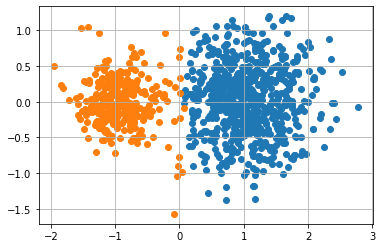

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

x = np.loadtxt("sample-gauss2.txt", delimiter=" ")

# グループの数
k = 2

# クラスタリング   
km = KMeans(n_clusters=k, init='random')
g = km.fit_predict(x)

# 結果のプロット
cmap = plt.get_cmap("tab10")
for ell in range(k):
    plt.scatter(x[g==ell,0], x[g==ell,1], color=cmap(ell))
plt.grid(True)

plt.show()


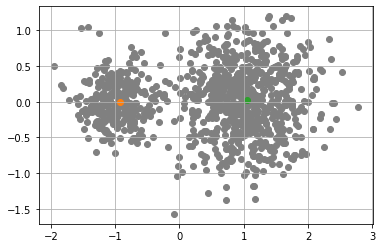

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans

x = np.loadtxt("sample-gauss2.txt", delimiter=" ")

# グループの数
k = 2

# クラスタリング   
codebook,distortion = kmeans(obs=x, k_or_guess=k)

# 結果のプロット
cmap = plt.get_cmap("tab10")
for i in range(x.shape[0]):
    plt.scatter(x[i,0], x[i,1], color='grey')
for ell in range(codebook.shape[0]):
    plt.scatter(codebook[ell,0], codebook[ell,1], color=cmap(ell+1))

plt.grid(True)
plt.show()


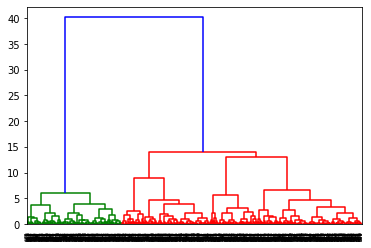

In [ ]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

x = np.loadtxt("sample-gauss2.txt",delimiter=" ")
N = x.shape[0]

# クラスタリング
link = linkage(x,'ward')
labels = range(0, N)

# 結果のプロット
dendrogram(link,
           orientation='top',
           labels=labels,
           distance_sort='descending',
           color_threshold=20.0,
           show_leaf_counts=True)
plt.show()

cluster ids: [1985, 1987, 1989, 1990, 1991, 1975, 1981, 1983]


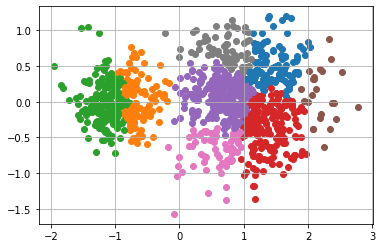

In [ ]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

def rewrite_id(id, link, group, step, n):
    i = int(link[step,0])
    j = int(link[step,1])
    if i<n:
        group[i] = id
    else:
        rewrite_id(id, link, group, i-n, n)

    if j<n:
        group[j] = id
    else:
        rewrite_id(id, link, group, j-n, n)

x = np.loadtxt("sample-gauss2.txt",delimiter=" ")
N = x.shape[0]

# クラスタリング
linked = linkage(x,'ward')
n = x.shape[0]
threshold=20
group=np.empty(n,dtype='int32')
step=0
while True:
    if step>= n-2:
        break
    dist = linked[step,2]   
    if dist>threshold:
        break
    rewrite_id(step+n, linked, group, step, n)
    step=step+1

# 結果のプロット
cmap = plt.get_cmap("tab10")
cids = list(set(group))

print('cluster ids:',cids)

for i in range(x.shape[0]):
    ell = cids.index(group[i]) % 10
    plt.scatter(x[i,0], x[i,1], color=cmap(ell))
plt.grid(True)
plt.show()

F1[Hz]:500
F2[Hz]:2500
カテゴリー番号: 1


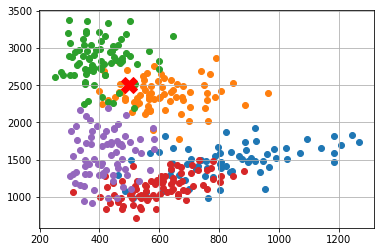

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

# データファイルの読み込み
x = np.loadtxt('jp-vowel-formants.txt', 
               dtype=[('f1',float),('f2',float),('cat',int)] )
n = x.shape[0]

# フォルマントの入力
f1 = float(input('F1[Hz]:'))
f2 = float(input('F2[Hz]:'))

# 入力値からの距離が近い順に並べ替え
y = np.empty((n,), dtype=[('dist',float),('cat',int)] )
for i,[u,v,c] in enumerate(x):
    dist = np.sqrt( (u-f1)**2 + (v-f2)**2 )
    y[i] = (dist,c)

y = np.sort(y,order="dist")

# k（以下では5）近傍内のデータ点を確認
k = 5

cats = np.zeros((5,))
for cnt,item in enumerate(y):
    if cnt>=k:
        break
    i = item['cat']
    cats[i] = cats[i]+1

# 出現回数の多い近接点のカテゴリを出力
cat = np.argmax(cats)

print('カテゴリー番号:',cat)

cmap = plt.get_cmap("tab10")
for q in x:
    plt.scatter(q['f1'], q['f2'], color=cmap(q['cat']))
plt.plot([f1],[f2],'X',color='red',markersize=16)
plt.grid(True)
plt.show()


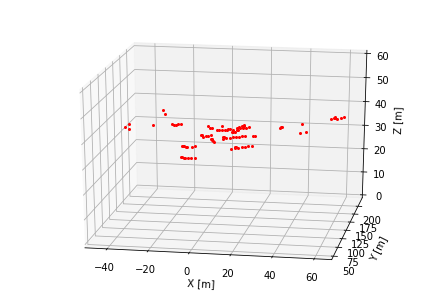

In [ ]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage

x = np.loadtxt("geese-3d-pos.txt",delimiter=" ")
N = x.shape[0]

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")
ax.set_zlim(0,60)

ax.plot(x[:,0], x[:,1], x[:,2], "o", 
        color="red",markersize=2)
ax.view_init(elev= 20, azim=-80)
plt.show()


以下のコードを使うと、ブラウザ上でも「ぐりぐり」回したりズーミングしたりできます

In [ ]:
import sys
import numpy as np
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage

X = np.loadtxt("geese-3d-pos.txt",delimiter=" ")
N = X.shape[0]

fig = go.Figure(
    data=[go.Scatter3d(
            x=X[:,0], y=X[:,1], z=X[:,2],
            mode='markers',
            marker=dict(
                symbol='circle',
                size=3,
                opacity=0.8
                )
            )]
    )

fig.update_layout(
    scene=dict(zaxis = dict(range=[0,60])),
    margin=dict(l=0, r=0, b=0, t=0))
fig.show()
